In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = '/home/tamaru/scene_categorize/main/data/insta_cube/lab/lab_desk_table/0/lab_desk_table_0_img_000000.png'

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FEDADD032E8>


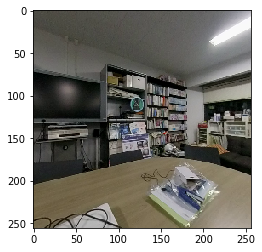

In [3]:
img = Image.open(image)
img_np = np.array(img, dtype=np.uint8)
print(img)
plt.imshow(img)

In [4]:
SR_saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
FG_saliency = cv2.saliency.StaticSaliencyFineGrained_create()

(SR_success, SR_saliencyMap) = SR_saliency.computeSaliency(img_np)
(FG_success, FG_saliencyMap) = FG_saliency.computeSaliency(img_np)
print("SR: ", SR_success)
print("FG: ", FG_success)
SR_saliencyMap = (SR_saliencyMap*255).astype("uint8")
FG_saliencyMap = (FG_saliencyMap*255).astype("uint8")

SR:  True
FG:  True


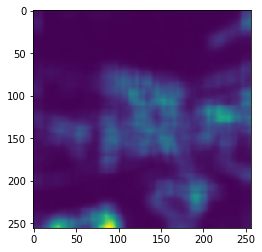

In [5]:
plt.imshow(SR_saliencyMap)

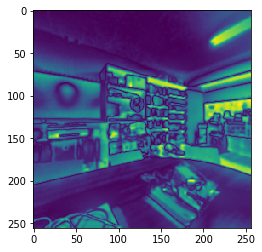

In [6]:
plt.imshow(FG_saliencyMap)

In [7]:
print(img_np.shape)

(256, 256, 3)


In [8]:
def reverse_saliency(img):
    """
    
    """
    rev_sal = (255 - FG_saliencyMap)/255
    rev_sal_0 = img_np[:,:,0]*rev_sal
    rev_sal_1 = img_np[:,:,1]*rev_sal
    rev_sal_2 = img_np[:,:,2]*rev_sal
    rev_sal_np = np.arange(256*256*3).reshape(256,256,3)
    rev_sal_np[:,:,0] = rev_sal_0
    rev_sal_np[:,:,1] = rev_sal_1
    rev_sal_np[:,:,2] = rev_sal_2
    rev_sal_np = np.array(rev_sal_np,dtype=np.uint8)

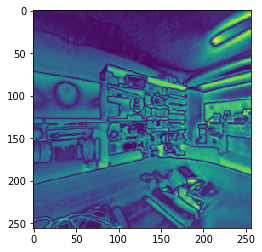

In [9]:
(FG_success, FG_saliencyMap) = FG_saliency.computeSaliency(rev_sal_np)
plt.imshow((FG_saliencyMap*255).astype("uint8"))

In [ ]:
img_np

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
from torch.autograd import Variable

# 特徴抽出


In [ ]:
net = models.vgg16(pretrained=True, progress=True).features

In [ ]:
preprocess = transforms.Compose([
    transforms.Scale(256),
    transforms.ToTensor()
])
img_tensor = preprocess(img)
img_tensor.unsqueeze_(0)
img_variable = Variable(img_tensor) #Variable
net.train(False)
output = net.forward(img_variable)
output

In [ ]:
print(type(output))

In [ ]:
output = output.detach().numpy()

In [ ]:
print(output.shape)

In [ ]:
output = output.squeeze()

In [ ]:
(FG_success, FG_saliencyMap) = FG_saliency.computeSaliency(img_np)
SR_saliencyMap = (SR_saliencyMap*255).astype("uint8")